## Static dataset creation
This notebook walks through how to use the modules to create and save a static dataset for use in all of the statistical and ML methods. The method-focused notebooks show how to import and utilize this static dataset in inference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data.data import MyDataLoader, DataPreparation

Use the `DataPreparation()` class from `io` to simulate some linear data with two levels of noise.

Low noise is $\sigma = 1$. High noise is $\sigma = 10$. Both use the same input xs and same priors. Let's simulate the low noise first.

In [2]:
data = DataPreparation()

In [3]:
size_df = 1000
noise = 'low'
data.sample_params_from_prior(size_df, 42)

In [4]:
if noise == 'low':
    sigma = 1
if noise == 'medium':
    sigma = 5
if noise == 'high':
    sigma = 10
if noise == 'vhigh':
    sigma = 100
data.simulate_data(data.params,
                   sigma, 
                   'linear_homogeneous'
                    )

Linear homogeneous simulation data generated.


Let's take a look at this simulated dataset.

In [ ]:
print(np.shape(data.output[0]))
data.output

In [ ]:
data.params

In [ ]:
plt.clf()
for i in range(5):
    plt.plot(data.input, data.output[i])
    plt.scatter(data.input, data.output[i],
                label = f'$m = ${data.params[i][0]}, $b = ${data.params[i][1]}')
plt.legend()
plt.show()
    

In [ ]:
# now make it into a dataframe
dict = data.get_dict()
dict

## Save the data to h5

In [ ]:
saver = MyDataLoader()

In [ ]:
# save the dataframe
filepath = '../data/'
saver.save_data_h5('linear_sigma_'+str(sigma)+'_size_'+str(size_df), dict)

## Repeat the above but now for linear heterogeneous data

In [5]:
data.simulate_data(data.params,
                   sigma, 
                   'linear_heterogeneous'
                    )

Linear heterogeneous simulation data generated.


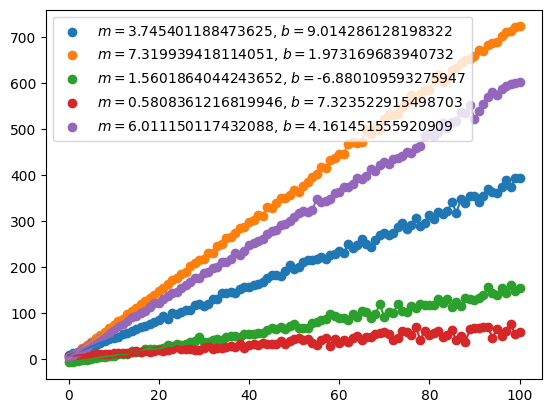

In [6]:
plt.clf()
for i in range(5):
    plt.plot(data.input, data.output[i])
    plt.scatter(data.input, data.output[i],
                label = f'$m = ${data.params[i][0]}, $b = ${data.params[i][1]}')
plt.legend()
plt.show()

In [7]:
dict_ht = data.get_dict()
saver = MyDataLoader()
filepath = '../data/'
saver.save_data_h5('linear_heterogeneous_sigma_'+str(sigma)+'_size_'+str(size_df), dict_ht)